**Importamos las librerias necesarias**

In [1]:
%run helper.ipynb
%run helper_2.ipynb

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [2]:
%load_ext autoreload
%autoreload 2

##**EDA**

**Realizo un análisis exploratorio de la base de datos con la que voy a trabajar.**

**Comienzo imprimiendo una imagen aleatoria.**

<function matplotlib.pyplot.show(close=None, block=None)>

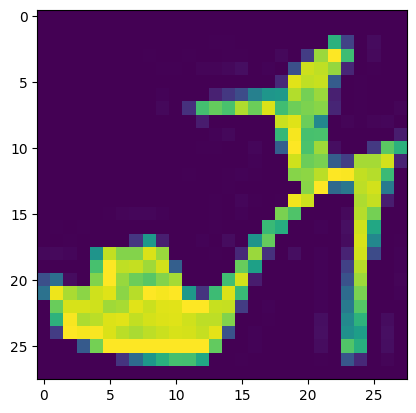

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_imgs[9,...])
plt.show

**Luego separo el dataset en una lista de listas que divide a las imagenes por categoría**

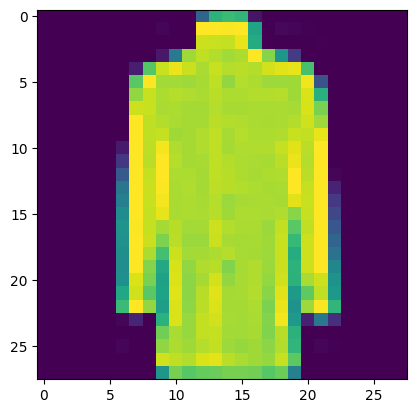

In [4]:
#Imprimo un coat (el sexto de la clase) para verificar
plt.imshow(datasets[4][6])

**Hago histogramas para la iluminación de los pixeles de las diferentes categorias de prendas. Aqui vemos que hay mucho espacio de las imágenes en negro, y que por lo demás la forma de las distibuciones es similar, excepto por los diferentes tipos de zapatos que -como es de esperar- parecen tener mucho más espacio oscuro de la imagen.**

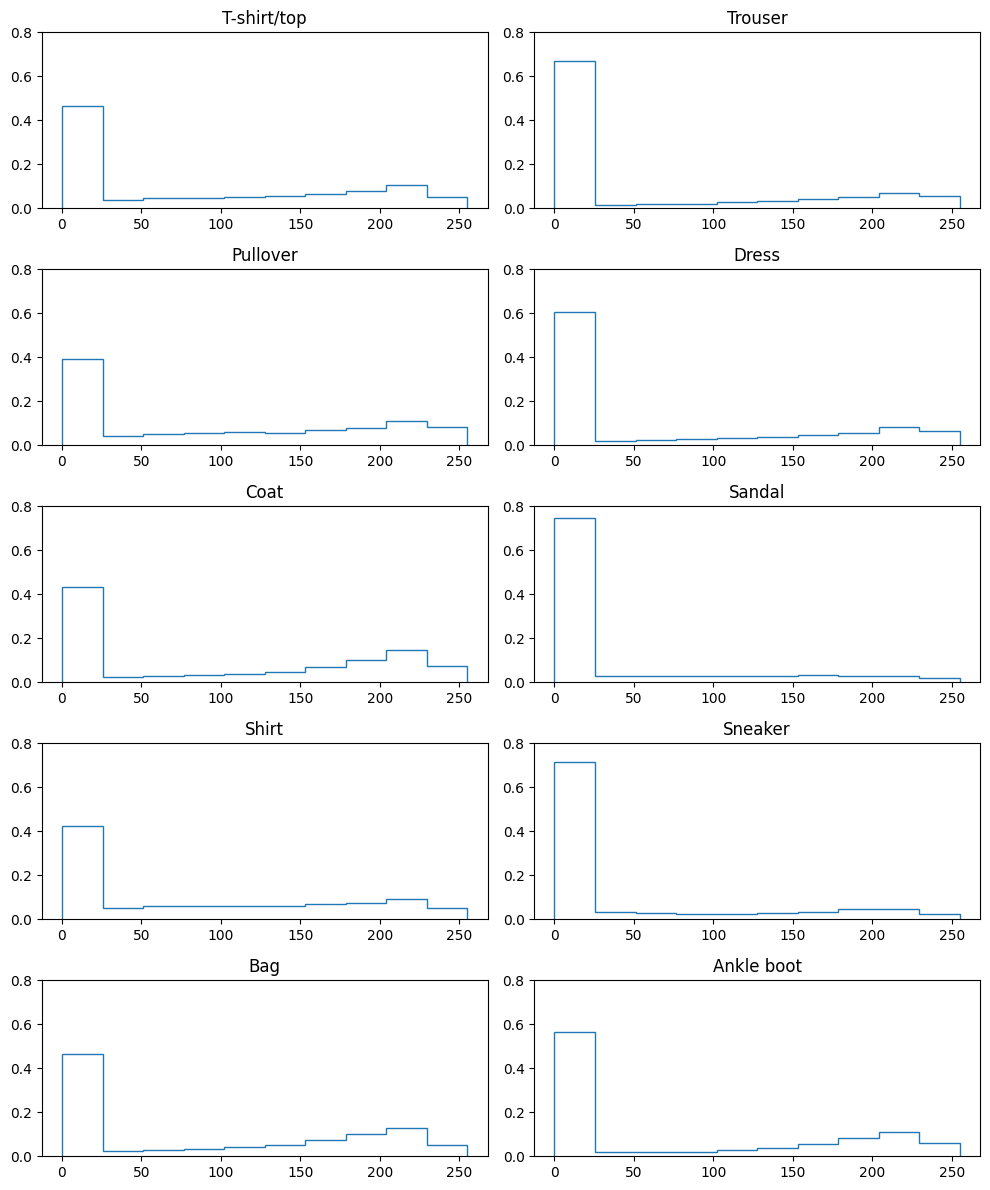

In [5]:
plot_histograms()

**Luego realizo una serie de imágenes promedio de cada categoría de prenda. Esto es, por cada clase promedio al iluminación de todas las imágenes para crear un perfil de lo que espero en cada categoría. Aquí se ve cuales son las clases que más se pueden confundir entre si, y cuales presentan una mayor varianza.**

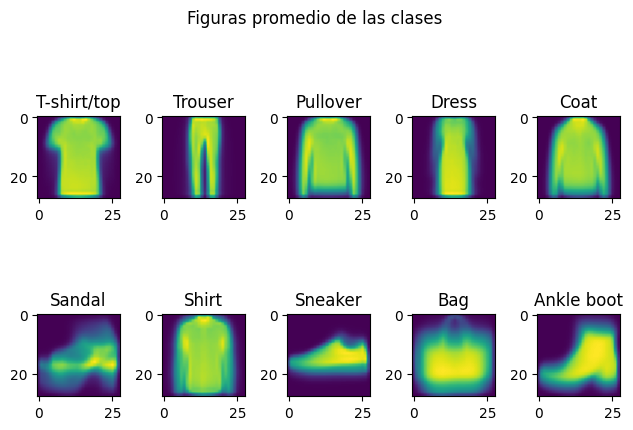

In [6]:
print_average_items()

**Separo entre train y validación, data augmentation. Para esto último opté por sumar al dataset de training las imagenes flipeadas horizontalmente, ya que es simple de lograr y agrega cierta varianza extra al no ser la mayoría de las prendas exactamente simétricas horizontalmente.**

In [5]:
from sklearn.model_selection import train_test_split

labels= np.array(train_labels['label'])
train_imgs = np.load('train_images.npy')
X_train, X_val, y_train, y_val = train_test_split(train_imgs, labels, test_size=0.1, random_state=50)

flipped = np.flip(X_train, axis=2)
X_train = np.concatenate((X_train, flipped), axis=0)
y_train = np.concatenate((y_train,y_train), axis=0)

y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)


##**Modelo softmax**

**Como primera aproximación al problema genero un modelo softmax para el mismo.** 

In [44]:
softmax_model = create_softmax_model(output_size = 10)
get_metrics(softmax_model, X_train, y_train_categorical, X_val, y_val_categorical)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 salida (Dense)              (None, 10)                7850      
                                                                 
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________
3375/3375 [==============================] - 3s 874us/step - loss: 0.4630 - accuracy: 0.8435
test loss:  0.46295565366744995 test accuracy:  0.8435462713241577
188/188 [==============================] - 0s 843us/step - loss: 0.4720 - accuracy: 0.8

**La validation accuracy es de 0.836, lo que sobrepasa cómodamente lo requerido por la consigna y representa un piso sorprendentemente elevado de performance.**

##**Modelos MPL:**

**Se propondrán varios modelos con diferentes configuraciones con fines exploratiorios.**

In [55]:
_, model1 = train_model1(X_train, y_train_categorical, X_val, y_val_categorical,
opt=optimizers.Adam(learning_rate=0.001, decay=1E-4), 
b_s=250, 
act='relu', 
pat=10, 
init=keras.initializers.GlorotNormal)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 middle1 (Dense)             (None, 150)               117750    
                                                                 
 batch_normalization_1 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 middle2 (Dense)             (None, 50)                7550      
                                                                 
 salida (Dense)              (None, 10)                5

In [56]:
print('model 1 metrics: ')
get_metrics(model1, X_train, y_train_categorical, X_val, y_val_categorical)

model 1 metrics: 
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0771 - accuracy: 0.9747
test loss:  0.0771026536822319 test accuracy:  0.9746666550636292
188/188 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.8955
validation loss:  0.3476754128932953 validation accuracy:  0.8955000042915344
188/188 [==============================] - 0s 1000us/step
f1 score:  0.8955
precision score:  0.8955
recall score:  0.8955
roc auc:  0.9951396342592592


In [57]:
_, model2 = train_model2(X_train, y_train_categorical, X_val, y_val_categorical,
opt=optimizers.Adam(learning_rate=0.001, decay=1E-4), 
b_s=250, 
act='relu', 
pat=10, 
init=keras.initializers.GlorotNormal)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 middle1 (Dense)             (None, 1500)              1177500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 middle2 (Dense)             (None, 800)               1200800   
                                                                 
 dropout_1 (Dropout)         (None, 800)               0         
                                                        

In [58]:
print('model 2 metrics: ')
get_metrics(model2, X_train, y_train_categorical, X_val, y_val_categorical)

model 2 metrics: 
3375/3375 [==============================] - 13s 4ms/step - loss: 0.0291 - accuracy: 0.9936
test loss:  0.02911885641515255 test accuracy:  0.9935833215713501
188/188 [==============================] - 1s 4ms/step - loss: 0.3195 - accuracy: 0.9120
validation loss:  0.3194705545902252 validation accuracy:  0.9120000004768372
188/188 [==============================] - 1s 4ms/step
f1 score:  0.912
precision score:  0.912
recall score:  0.912
roc auc:  0.9963986157407407


In [62]:
_, model3 = train_model3(X_train, y_train_categorical, X_val, y_val_categorical,
opt=optimizers.Adam(learning_rate=0.001, decay=1E-4), 
b_s=250, 
act='relu', 
pat=10, 
init=keras.initializers.GlorotNormal)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 middle1 (Dense)             (None, 1500)              1177500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 middle2 (Dense)             (None, 800)               1200800   
                                                                 
 batch_normalization_1 (Batc  (None, 800)              3200      
 hNormalization)                                        

In [63]:
print('model 3 metrics: ')
get_metrics(model3, X_train, y_train_categorical, X_val, y_val_categorical)

model 3 metrics: 
3375/3375 [==============================] - 15s 4ms/step - loss: 0.0322 - accuracy: 0.9907
test loss:  0.032201237976551056 test accuracy:  0.9906851649284363
188/188 [==============================] - 1s 4ms/step - loss: 0.3665 - accuracy: 0.9135
validation loss:  0.36647433042526245 validation accuracy:  0.9135000109672546
188/188 [==============================] - 1s 4ms/step
f1 score:  0.9135
precision score:  0.9135
recall score:  0.9135
roc auc:  0.9958985910493827


**Propongo un modelo simple para ejecutar la variedad de benchmarks requeridos en un tiempo razonable. Este modelo tiene solamente una capa oculta.**
**Su performance es buena, siendo su validation accuracy 0.893, como se ve más abajo. Además se eligio un batch size deliberadamente alto para agilizar las pruebas.**

In [68]:
%run helper.ipynb
_, model = train_model(X_train, y_train_categorical, X_val, y_val_categorical,
opt=optimizers.Adam(learning_rate=0.001, decay=1E-4), 
b_s=2048, 
act='relu', 
pat=10, 
init=keras.initializers.GlorotNormal)

model.summary()

t_loss, t_accuracy = model.evaluate(X_train, y_train_categorical)
print('test loss: ', t_loss,'test accuracy: ', t_accuracy)

v_loss, v_accuracy = model.evaluate(X_val, y_val_categorical)
print('validation loss: ', v_loss,'validation accuracy: ',v_accuracy)


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 middle1 (Dense)             (None, 500)               392500    
                                                                 
 salida (Dense)              (None, 10)                5010      
                                                                 
Total params: 400,646
Trainable params: 399,078
Non-trainable params: 1,568
_________________________________________________________________
3375/3375 [==============================] - 5s 1ms/step - loss: 0.060

#**Batch sizes**
**A continuacion se prueba la performance con diferentes batch sizes. Se comprueba que la performance parece disminuir al aumentar el tamaño del batch size. Pero en particular, lo que es más claro es que a mayor el batch size, se necesitn bastantes más epochs para que el modelo converja.** 

In [69]:
batch_sizes = [2**7,2**8,2**9, 2**10, 2**11, 2**12, 2**13]
accuracy_values = []
for batch_size in batch_sizes:
    acc_val_hist, _ = train_model(X_train, y_train_categorical, X_val, y_val_categorical,
    opt=optimizers.Adam(learning_rate=0.001, decay=1E-4), 
    b_s=batch_size, 
    act='relu', 
    pat=10, 
    init=keras.initializers.GlorotNormal)
    accuracy_values.append(acc_val_hist)


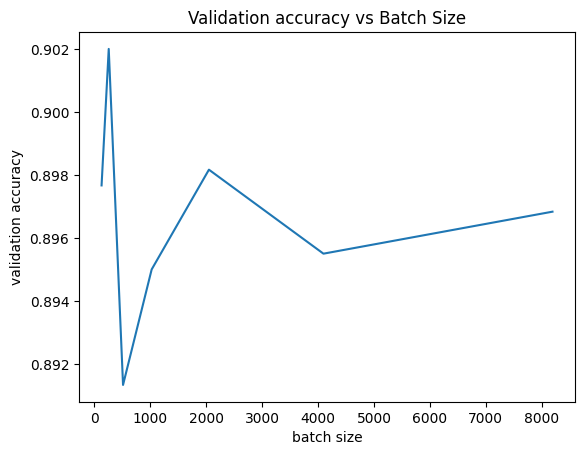

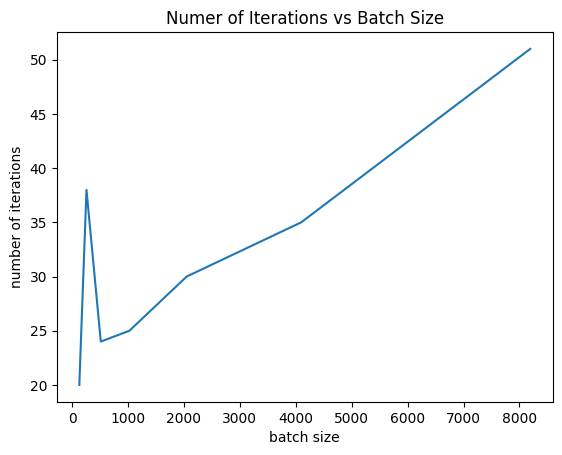

In [70]:
make_batch_size_graphs()

#**LR con SGD**
**A continuación se prueba la performance de un optimizador con learning rate fijo con diferentes valores de lr. Lo que sucede es que para valores muy pequeños de lr el modelo tarda demasiado en converger, alcanzando el límite de 100 epochs impuesto en el entrenamiento sin activarse el early stopping. En cambio para valores de lr altos (0.1, 0.01) el modelo convergio a la performance esperada. Sin embargo, si el lr es exageradamente alto (1) el modelo no logra entrenar.** 

In [71]:
learning_rates = [0.0001, 0.001, 0.01 ,0.1,1]
accuracy_values = []

for learning_rate in learning_rates:

    acc_val_hist, _ = train_model(X_train, y_train_categorical, X_val, y_val_categorical,
    opt=optimizers.SGD(learning_rate=learning_rate), 
    b_s=2500, 
    act='relu', 
    pat=10, 
    init=keras.initializers.GlorotNormal)
    accuracy_values.append(acc_val_hist)


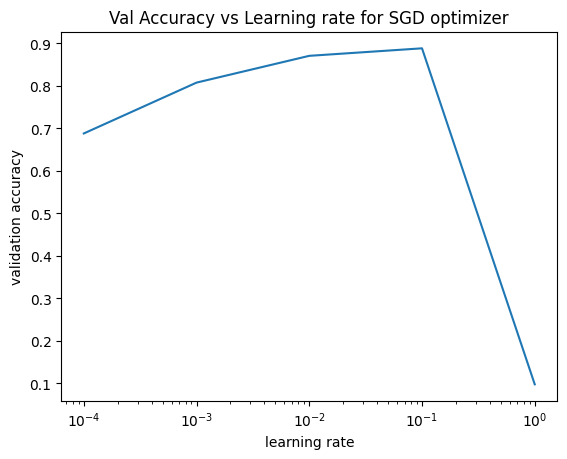

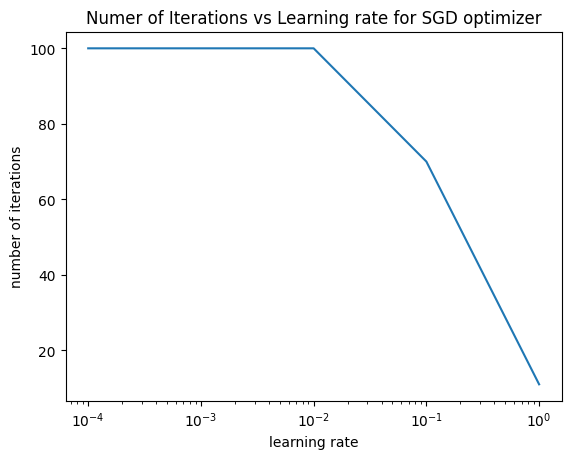

In [72]:
make_learning_rate_graphs()

#**LR con Adam**

**Contrario que para SGD, en el caso de Adam (cuyo lr es adaptativo en entrenamiento), la performance parece decaer con lr más altos. Sin embargo este empeoramiento de la performance es mínimo, y hay que notar que la cantidad de epochs necesaria para llegar al valor de convergencia es mucho mayor.**  

In [73]:
learning_rates = [0.0001, 0.001, 0.01 ,0.1,1]
accuracy_values = []

for learning_rate in learning_rates:

    acc_val_hist, _ = train_model(X_train, y_train_categorical, X_val, y_val_categorical,
    opt=optimizers.Adam(learning_rate=learning_rate), 
    b_s=2500, 
    act='relu', 
    pat=10, 
    init=keras.initializers.GlorotNormal)
    accuracy_values.append(acc_val_hist)

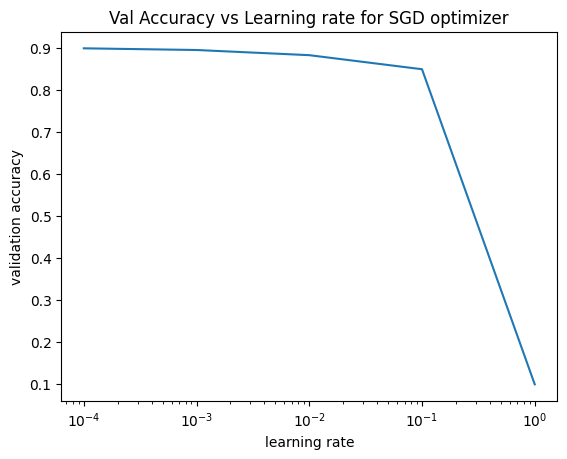

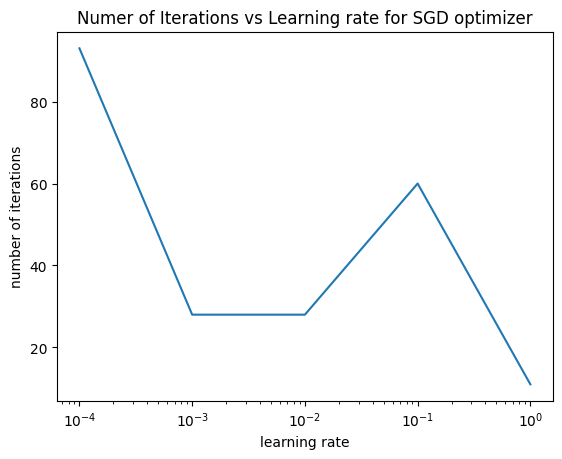

In [74]:
make_learning_rate_graphs_adam()

#**Optimizadores**
**A continuación se comparan diferentes optimizadores, con sus lr configurados como los sugeridos por Keras. Para este problema parece que Adam es el mejor optimizador, aunque nadam, adamax y RMSprop no se quedan muy atrás.**

In [76]:
my_optimizers = [optimizers.SGD(), optimizers.Adam(),optimizers.Adamax(), optimizers.Adagrad(),optimizers.Nadam(), optimizers.RMSprop()]
accuracy_values = []

for optimizer in my_optimizers:
    acc_val_hist, _ = train_model(X_train, y_train_categorical, X_val, y_val_categorical,
    opt=optimizer, 
    b_s=2500, 
    act='relu', 
    pat=5, 
    init=keras.initializers.GlorotNormal)
    accuracy_values.append(acc_val_hist)



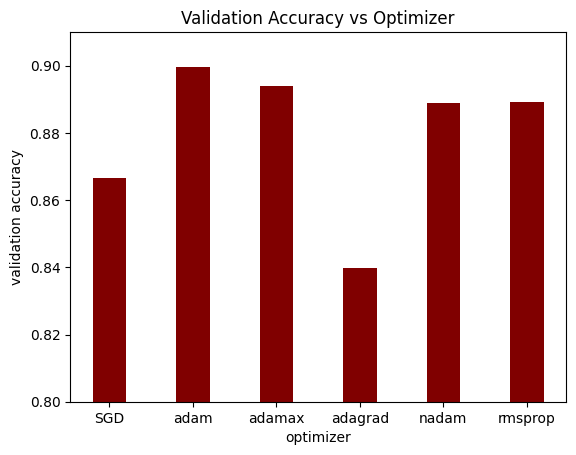

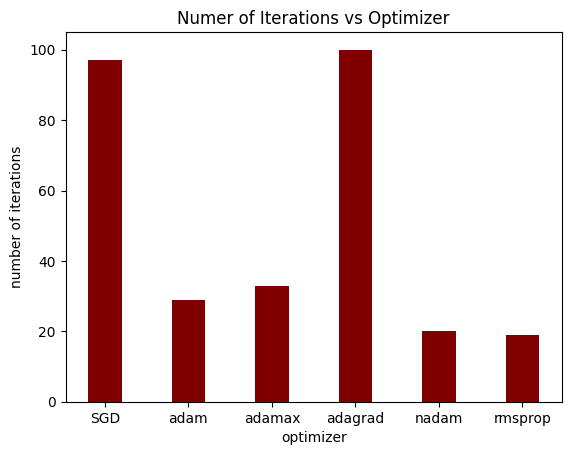

In [83]:
make_optimizer_graphs()

#**Funciones de activación**
**A continuación paso a analizar diferentes funciones de activación. De la selección probada, todas parecen tener una buena performance, aunque para este caso la función sigmoidea parece tener una performance marginalmente superior.** 

In [84]:
activations = ['relu', 'tanh', 'sigmoid', 'softplus']
accuracy_values = [ ]

for activation in activations:

    acc_val_hist, _ = train_model(X_train, y_train_categorical, X_val, y_val_categorical,
    opt=optimizers.Adam(learning_rate=0.001, decay=1e-4), 
    b_s=2500, 
    act=activation, 
    pat=10, 
    init=keras.initializers.GlorotNormal)
    accuracy_values.append(acc_val_hist)


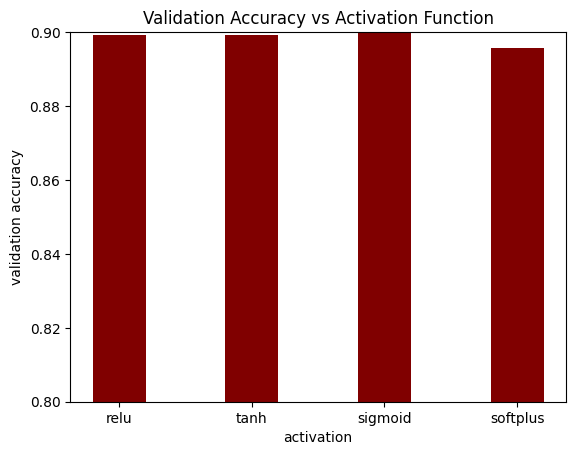

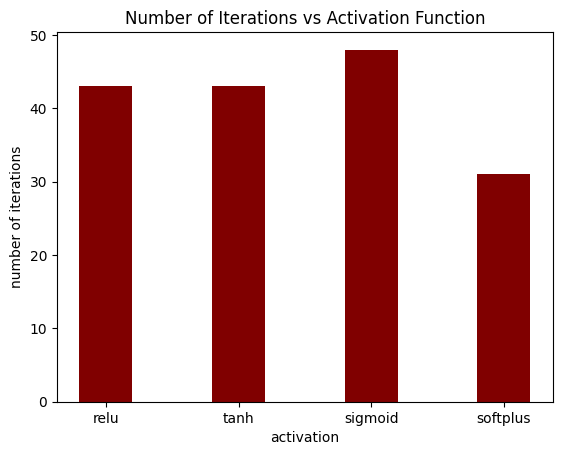

In [85]:
make_activation_graphs()

#**Inicializadores de pesos**

**Por último comparo diferenctes inicializaciones de pesos. COmo se vio en el curso, una dsitribución normal con desvio estandar .1, glorot normal y glorot uniform parecen funcionar de manera más que satisfactoria.** 

In [86]:
initializtions = [keras.initializers.RandomNormal(mean=0., stddev=.1, seed=34),
                  keras.initializers.RandomNormal(mean=0., stddev=1., seed=56), 
                  keras.initializers.GlorotNormal, 
                  keras.initializers.GlorotUniform]
accuracy_values = [ ]

for initialization in initializtions:
    acc_val_hist, _ = train_model(X_train, y_train_categorical, X_val, y_val_categorical,
    opt=optimizers.Adam(learning_rate=0.001, decay=1e-4), 
    b_s=2500, 
    act='relu', 
    pat=10, 
    init=initialization)
    accuracy_values.append(acc_val_hist)


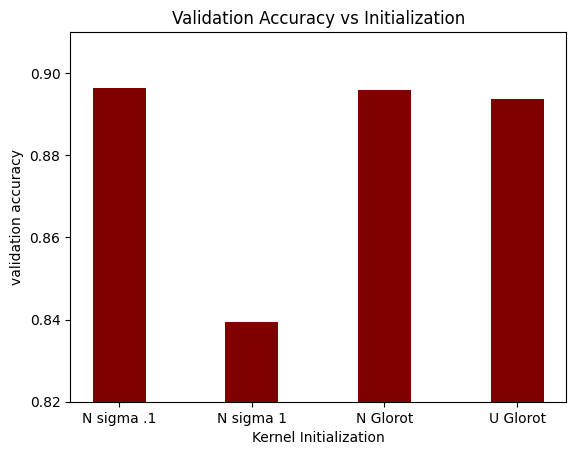

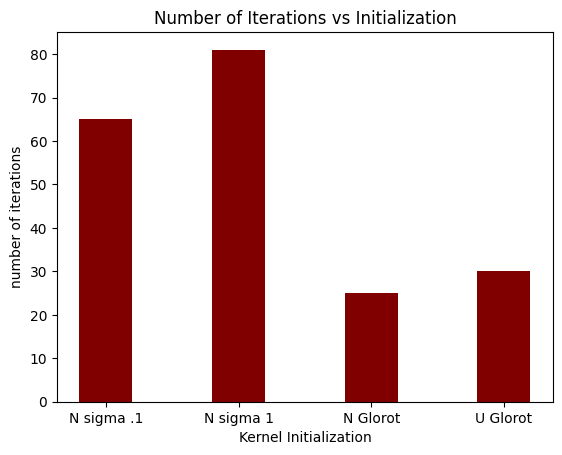

In [87]:
make_initializer_graphs()

#**Mapeo de predicciones y umbrales de decisión**

**A continuación se busca graficar los umbrales de decisión para clasificar los items que se alimentan al modelo agregando una capa linear de dos neuronas, de modo que se pueda mostrar como de distribuyen los puntos según los pesos de esta última capa.**

In [88]:
_, model_1_dot_3 = train_model_1dot3(X_train, y_train_categorical, X_val, y_val_categorical,
opt=optimizers.Adam(learning_rate=0.001, decay=1e-4), 
b_s=2500, 
act='relu', 
pat=10, 
init=keras.initializers.GlorotNormal)

model_1_dot_3.summary()


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 middle1 (Dense)             (None, 500)               392500    
                                                                 
 2nLayer (Dense)             (None, 2)                 1002      
                                                                 
 salida (Dense)              (None, 10)                30        
                                                                 
Total params: 396,668
Trainable params: 395,100
Non-trainable params: 1,568
____

In [89]:
model_trunc = tf.keras.Model(model_1_dot_3.input, model_1_dot_3.layers[-2].output)
model_trunc.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (InputLayer)  [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 middle1 (Dense)             (None, 500)               392500    
                                                                 
 2nLayer (Dense)             (None, 2)                 1002      
                                                                 
Total params: 396,638
Trainable params: 395,070
Non-trainable params: 1,568
___________________________________________________

In [90]:
predictions = model_trunc.predict(np.vstack([X_train, X_val]), verbose=1)
maxs = np.max(predictions, axis=0)
mins = np.min(predictions, axis=0)
print(maxs, mins)

3563/3563 [==============================] - 5s 1ms/step
[ 98.38309 199.46732] [-112.25688 -124.09313]


In [91]:
predictions_train = model_trunc.predict(X_train, verbose=1)
predictions_val = model_trunc.predict(X_val, verbose=1)
N = 500
x1, x2 = np.meshgrid(np.linspace(mins[0], maxs[0], N), np.linspace(mins[1], maxs[1], N))
x_mesh = np.c_[x1.ravel(), x2.ravel()]
model_last_trunc = Sequential()
model_last_trunc.add(Dense(10, input_shape=(2,)))
model_last_trunc.set_weights(model_1_dot_3.get_layer('salida').get_weights())
pred_mesh = model_last_trunc.predict(x_mesh, verbose=1)
Z = np.argmax(pred_mesh, axis=1).reshape(x1.shape)/10

7813/7813 [==============================] - 4s 555us/step


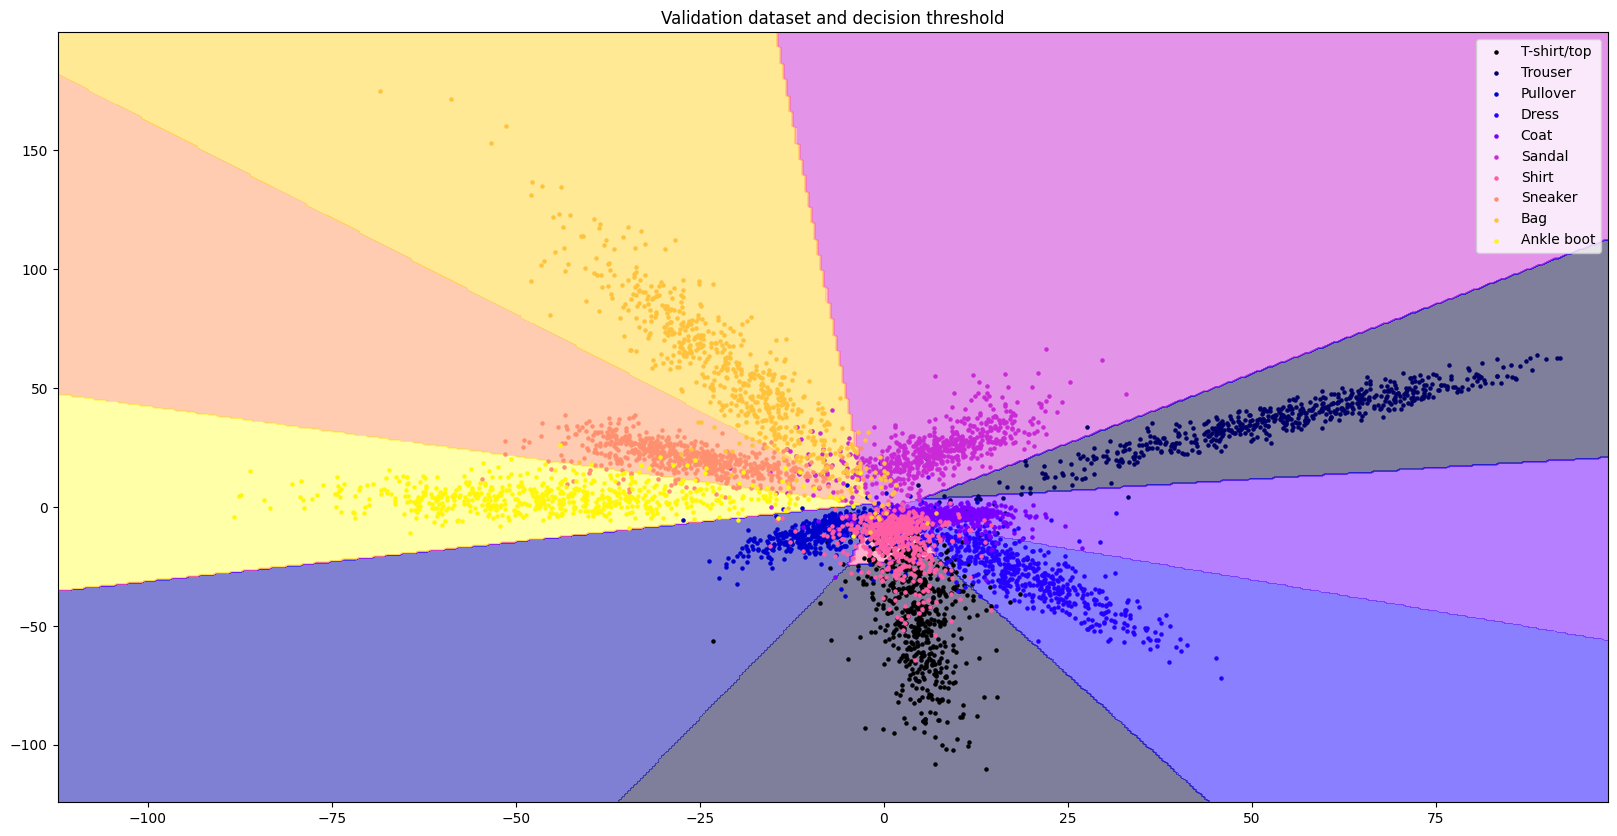

In [92]:
keys = {
    0:    'T-shirt/top',
    1:    'Trouser',
    2:    'Pullover',
    3:    'Dress',
    4:    'Coat',
    5:    'Sandal',
    6:    'Shirt',
    7:    'Sneaker',
    8:    'Bag',
    9:    'Ankle boot'}

plt.figure(figsize=(20,10))
plt.contourf(x1, x2, Z, 10, cmap=plt.cm.gnuplot2, alpha=0.5)

for i in range(10):
    plt.scatter(predictions_val[y_val == i, 0], predictions_val[y_val == i, 1], c=[plt.cm.gnuplot2(i/10)], s=5, label=keys[i])
plt.title('Validation dataset and decision threshold')
plt.legend()
plt.show()

#**Hipótesis del lottery ticket**

**A continuacion se busca analizar la hipotesis conocida como 'lottery ticket'.**

**Primero compilamos un modelo y lo guardamos sin entrenar.**

In [11]:

output_size = 10
normal_initializer = keras.initializers.GlorotNormal
uniform_initializer = keras.initializers.GlorotUniform

K.clear_session()
model = Sequential()
model.add(Flatten(input_shape=(28,28)))

model.add(BatchNormalization())
model.add(Dense(500, activation='relu', kernel_initializer=normal_initializer, name='middle0'))
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu', kernel_initializer=normal_initializer, name='middle1'))
model.add(Dropout(0.2))
model.add(Dense(500, kernel_initializer=normal_initializer, name='middle2'))
model.add(BatchNormalization())
model.add(Dense(500, activation='relu', kernel_initializer=normal_initializer, name='middle3'))
model.add(Dropout(0.2))
model.add(Dense(output_size, activation='softmax',  kernel_initializer=normal_initializer, name='salida'))
model.summary()


adam = optimizers.Adam(learning_rate=0.001, decay=1E-4) #decay=1e-4
earlyStopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.save('model_without_training')




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 middle0 (Dense)             (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 middle1 (Dense)             (None, 500)               250500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                        

**Luego se lo entrena y se lo guarda de nuevo.**

In [12]:
model.fit(X_train, 
          y_train_categorical ,
          epochs=200, batch_size=200, 
          verbose=1, 
          validation_data=(X_val, y_val_categorical), 
          callbacks=[earlyStopping],
         )
model.save('trained_model')
get_metrics(model, X_train, y_train_categorical, X_val, y_val_categorical)


Epoch 1/200
540/540 [==============================] - 9s 15ms/step - loss: 0.4888 - accuracy: 0.8234 - val_loss: 0.3510 - val_accuracy: 0.8712
Epoch 2/200
540/540 [==============================] - 7s 14ms/step - loss: 0.3621 - accuracy: 0.8674 - val_loss: 0.3212 - val_accuracy: 0.8793
Epoch 3/200
540/540 [==============================] - 7s 13ms/step - loss: 0.3207 - accuracy: 0.8814 - val_loss: 0.2952 - val_accuracy: 0.8885
Epoch 4/200
540/540 [==============================] - 7s 13ms/step - loss: 0.2929 - accuracy: 0.8905 - val_loss: 0.2912 - val_accuracy: 0.8908
Epoch 5/200
540/540 [==============================] - 7s 14ms/step - loss: 0.2713 - accuracy: 0.8985 - val_loss: 0.2975 - val_accuracy: 0.8898
Epoch 6/200
540/540 [==============================] - 8s 14ms/step - loss: 0.2531 - accuracy: 0.9048 - val_loss: 0.2717 - val_accuracy: 0.8985
Epoch 7/200
540/540 [==============================] - 7s 14ms/step - loss: 0.2358 - accuracy: 0.9111 - val_loss: 0.2791 - val_accuracy:

**Luego analizamos qué pesos de la red cambiaron menos, y señalamos en particular cual es el 50% que menos lo hizo.**

In [13]:
K.clear_session()
model_wo_training = keras.models.load_model("model_without_training")
model_w_training = keras.models.load_model("trained_model")



initial_weights = model_wo_training.get_weights()
final_weights = model_w_training.get_weights()

weight_diff = [np.abs(initial - final) for initial, final in zip(initial_weights, final_weights)]


flattened_diff = np.concatenate([arr.flatten() for arr in weight_diff])
sorted_indices = np.argsort(flattened_diff)[::-1]


threshold_index = int(len(sorted_indices) * 0.5)
threshold = flattened_diff[sorted_indices[threshold_index]]


modified_weights = []
mask_weights_to_zero = []

for initial, final in zip(initial_weights, final_weights):
    mask = np.abs(final - initial) >= threshold
    mask_weights_to_zero.append(mask)
    modified_weights.append(np.where(mask, initial, 0.0))

final_model = keras.models.load_model("model_without_training")
final_model.set_weights(modified_weights)



**Creo un callback que vuelve a 0 en cada epoch los pesos que no quiero entrenar.**

In [14]:
from tensorflow.keras.callbacks import Callback

class ZeroWeightsCallback(Callback):
    def __init__(self, mask):
        super(ZeroWeightsCallback, self).__init__()
        self.mask = mask

    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.get_weights()
        modified_weights = []

        for w, m in zip(weights, self.mask):
            w = np.where(m == False, 0.0, w)  # Set weights to 0 where mask is 0
            modified_weights.append(w)

        self.model.set_weights(modified_weights)

zw_callback = ZeroWeightsCallback(mask_weights_to_zero)

**Finalmente entreno el modelo con este callback activado y configurado apra utilizar el golden ticket encontrado, y compruebo que la performance iguala a la del modelo original en la misma cantidad de epochs de entrenamiento y, lo que es más, la mejora marginalmente cuando este finaliza.** 

In [15]:

final_model.fit(X_train, 
          y_train_categorical ,
          epochs=200, batch_size=2048, 
          verbose=1, 
          validation_data=(X_val, y_val_categorical), 
          callbacks=[zw_callback, earlyStopping],
         )

get_metrics(final_model, X_train, y_train_categorical, X_val, y_val_categorical)


Epoch 1/200
53/53 [==============================] - 5s 83ms/step - loss: 0.5932 - accuracy: 0.7860 - val_loss: 0.5364 - val_accuracy: 0.8063
Epoch 2/200
53/53 [==============================] - 4s 80ms/step - loss: 0.4086 - accuracy: 0.8529 - val_loss: 0.5008 - val_accuracy: 0.8447
Epoch 3/200
53/53 [==============================] - 4s 79ms/step - loss: 0.3594 - accuracy: 0.8684 - val_loss: 0.4012 - val_accuracy: 0.8748
Epoch 4/200
53/53 [==============================] - 4s 82ms/step - loss: 0.3239 - accuracy: 0.8806 - val_loss: 0.3515 - val_accuracy: 0.8865
Epoch 5/200
53/53 [==============================] - 4s 81ms/step - loss: 0.3014 - accuracy: 0.8888 - val_loss: 0.3216 - val_accuracy: 0.8857
Epoch 6/200
53/53 [==============================] - 4s 82ms/step - loss: 0.2874 - accuracy: 0.8928 - val_loss: 0.3099 - val_accuracy: 0.8818
Epoch 7/200
53/53 [==============================] - 4s 79ms/step - loss: 0.2714 - accuracy: 0.8990 - val_loss: 0.2923 - val_accuracy: 0.8902
Epoch 

Problema de Regresión

In [88]:
train_morpho

,index,area,length,thickness,slant,width,height
0,0,107.3125,50.266504,2.460658,0.231074,14.539572,19.849054
1,1,123.2500,51.198485,2.616601,0.331858,15.387810,19.341053
2,2,78.3750,45.927670,1.891592,-0.212196,20.479656,19.114880
3,3,67.3125,22.849242,2.919769,0.509185,5.358179,19.724599
4,4,91.1875,46.284271,2.247425,0.007590,13.275437,19.527523
...,...,...,...,...,...,...,...
59995,59995,102.1875,61.415999,1.941380,0.366472,11.840672,19.937599
59996,59996,108.5625,46.705844,2.538071,0.364359,13.325950,19.688557
59997,59997,87.0625,44.523864,2.058077,0.257784,14.133500,20.070647
59998,59998,82.2500,53.337572,1.667193,0.310377,15.251961,19.692976


**A continuación se plotan histogramas del slant para cada número**

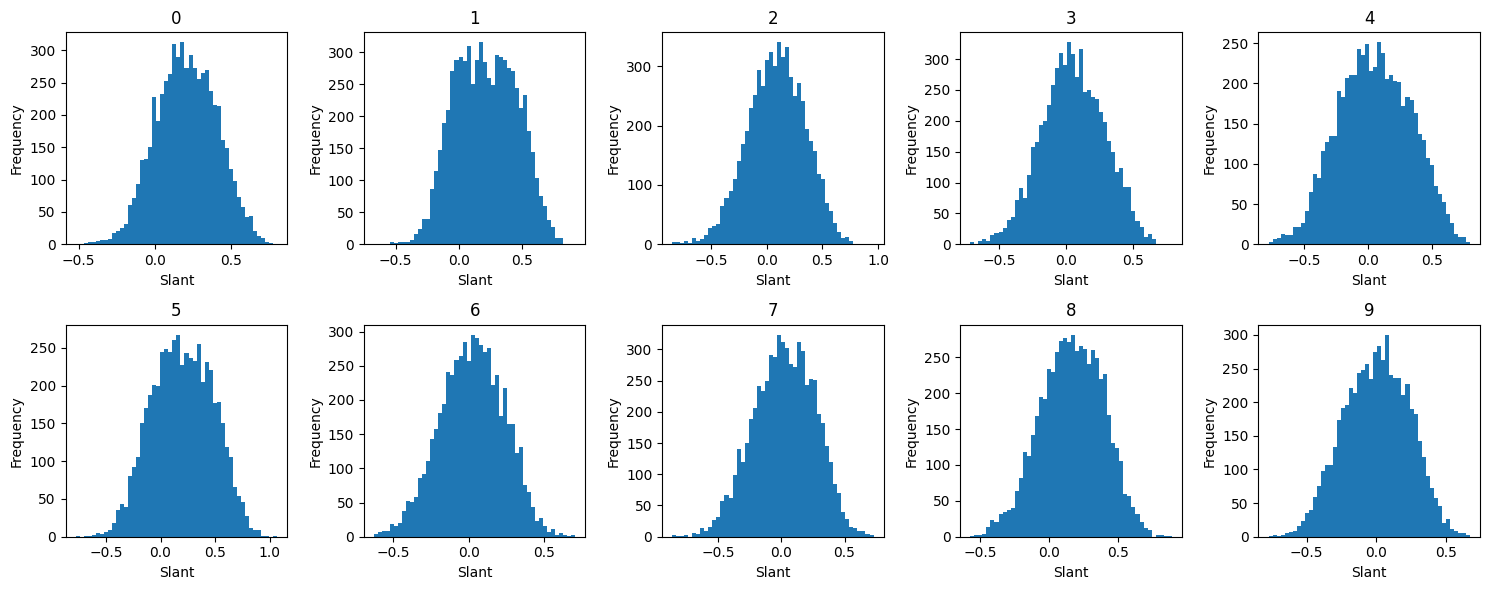

In [23]:
%run helper_2.ipynb
print_slant_histograms()

**Paso a analizar la correleción entre el slant y los otros datos morfológicos de los números.** 

In [91]:
for item in train_morpho.keys():
    print('correlation between '+item+ ' and slant is: ', train_morpho['slant'].corr(train_morpho[item]))

correlation between indexand slant is:  -0.006514073348763724
correlation between areaand slant is:  -0.005367359748599988
correlation between lengthand slant is:  -0.020269380801968277
correlation between thicknessand slant is:  0.00705162584853723
correlation between slantand slant is:  1.0
correlation between widthand slant is:  -0.15834194904399065
correlation between heightand slant is:  -0.14276048322572704


**Creo un modelo de dos capas para atacar este problema.** 

In [28]:
modela = create_base_MNIST_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 batch_normalization (BatchN  (None, 500)              2000      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 1)                 301       
                                                             

**La primera aploximación al problema (usando solamente las imágenes como dato) resulto en un mae de 0.00815**

In [29]:
modela.evaluate(x_test, test_morpho['slant'])

313/313 [==============================] - 1s 2ms/step - loss: 1.8037e-04 - mae: 0.0084


[0.00018036858818959445, 0.008424198254942894]

**Agregando de qué número se trata como un embedding de tamaño 2 la performance mejora, siendo la misma de 0.00745**

In [18]:
modelb = create_embedding_MNIST_model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 2)         20          ['input_2[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 784)          0           ['input_1[0][0]']                
                                                                                              

In [19]:
modelb.evaluate([x_test, y_test],np.array(test_morpho['slant']))

313/313 [==============================] - 1s 2ms/step - loss: 1.8795e-04 - mae: 0.0083


[0.00018794705101754516, 0.008259736932814121]

**Los vectores resultantes del embedding son los siguientes. El número más diferenciado en nuestro modelo resultan ser el 5, 7 y 2.** 

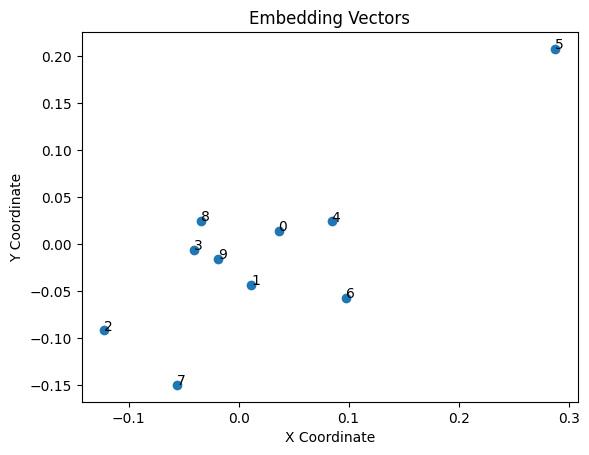

In [106]:
show_embedding_vectors(modelb)

**Finalmente creo un modelo que toma un dato continuo como parámetro. La performance resulta similar a la que viene de tomar el número como dato, y es de un mae igual a 0.0074.**

In [31]:
%run helper_2.ipynb
modelc = create_param_MNIST_model('width')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 normalization (Normalization)  (None, 1)            3           ['input_2[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 784)          0           ['input_1[0][0]']                
                                                                                              

In [32]:
modelc.evaluate([x_test, test_morpho['width']], test_morpho['slant'])

313/313 [==============================] - 1s 2ms/step - loss: 2.1484e-04 - mae: 0.0086


[0.0002148392959497869, 0.008623403497040272]

**EXTRA: modelo para la competencia**

In [101]:
%run helper.ipynb
_, model3 = train_modelcompe(X_train, y_train_categorical, X_val, y_val_categorical,
opt=optimizers.Adam(learning_rate=0.0001), 
b_s=250, 
act='relu', 
pat=10, 
init=keras.initializers.RandomNormal(mean=0., stddev=.1, seed=34))
get_metrics(modelcompe,X_train, y_train_categorical, X_val, y_val_categorical)

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 middle1 (Dense)             (None, 1500)              1177500   
                                                                 
 batch_normalization_1 (Batc  (None, 1500)             6000      
 hNormalization)                                                 
                                                                 
 middle2 (Dense)             (None, 800)               1200800   
                                                                 
 dropout (Drop

In [100]:
x_test = np.load('test_images.npy')
y_test = model3.predict(x_test)
labels = np.array([np.argmax(prediction) for prediction in y_test])
submission=pd.DataFrame({"id": np.arange(10000) , "Category" : labels})
submission.to_csv("submission.csv",index=False)

313/313 [==============================] - 2s 5ms/step
